#### Schema
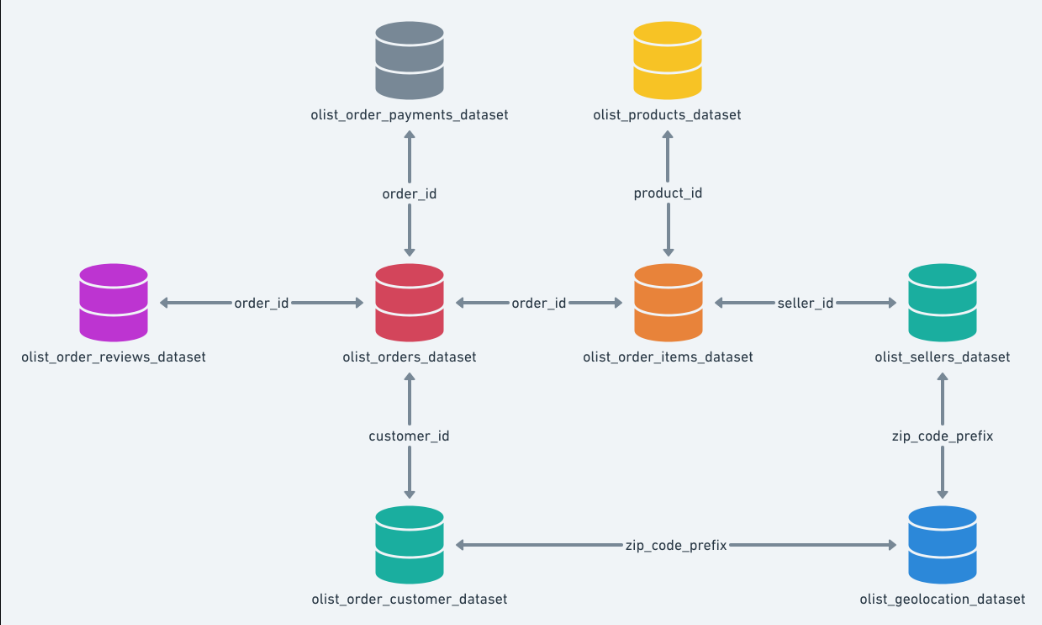

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
from datetime import datetime
import os
from matplotlib.ticker import FuncFormatter
#import folium
#from folium.plugins import HeatMap
import seaborn as sns
import squarify as sq
from matplotlib.ticker import PercentFormatter
from operator import attrgetter
import matplotlib.colors as mcolors
import matplotlib.ticker as tkr
from apyori import apriori
from collections import Counter
pd.set_option('display.max_columns', None)

#### Data Cleaning

In [2]:
#path of the folder containing the CSVs downloaded from kaggle
folder_path = 'D:\\AA_local_repos\\Olist_commerce\\archive'  

#a list of the names of files in the folder (we noticed the all end up with '_dataset.csv')
files = [f for f in os.listdir(folder_path)]# if f.endswith('_dataset.csv')]

#a loop to create a dataframe for each csv according to their file name
df_list=[]              #a list with all our dataframe names
for file in files:
    df_name = file.replace('olist_', '').replace('_dataset.csv', '').replace('.csv','')
    df_list.append(df_name)
    
    globals()[df_name] = pd.read_csv(os.path.join(folder_path, file))

print(df_list)

['customers', 'geolocation', 'orders', 'order_items', 'order_payments', 'order_reviews', 'products', 'sellers', 'product_category_name_translation']


In [3]:
#we will convert any columns to a prefered type, instead typing type() again and again we will check the datatype with the wrangler extension in VS code

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [6]:
#convert date columns from str to dt
for column in orders.columns[3:]:
    orders[column]=pd.to_datetime(orders[column])
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13


In [7]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [8]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


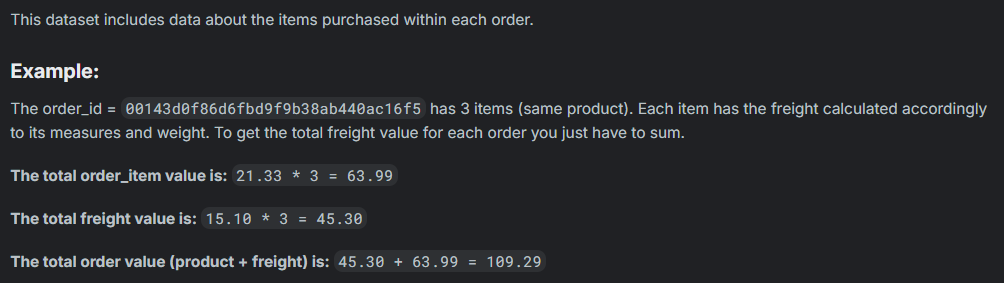

In [9]:
#according to the above we will create a new column as total_order_value

In [10]:
order_items['total_order_value']=order_items['price']+order_items['freight_value']
order_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19


In [11]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'])   #converted to dt
order_items['order_item_id']=order_items['order_item_id'].apply(str)    #converted ID to str

In [12]:
order_payments.head(2) #all good!

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [13]:
order_reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [14]:
order_reviews['review_creation_date']=pd.to_datetime(order_reviews['review_creation_date'])
order_reviews['review_answer_timestamp']=pd.to_datetime(order_reviews['review_answer_timestamp'])

In [15]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [16]:
customers['customer_zip_code_prefix']=customers['customer_zip_code_prefix'].apply(str)  #converted zipcodes to str

In [17]:
geolocation.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [18]:
geolocation['geolocation_zip_code_prefix']=geolocation['geolocation_zip_code_prefix'].apply(str)

In [19]:
products.head(2)  #all good!

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [20]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [21]:
sellers['seller_zip_code_prefix']=sellers['seller_zip_code_prefix'].apply(str)

In [22]:
product_category_name_translation.head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [23]:
#we will replace the portoguese product names with english ones
products = products.merge(
    product_category_name_translation,
    on='product_category_name',
    how='left'
)

In [24]:
products['product_category_name'] = products['product_category_name_english']
products.drop(columns=['product_category_name_english'], inplace=True)
products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### EDA

In [25]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [26]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [27]:
tab1=orders.merge(
    order_items,
    on='order_id',
    how='left'
)
tab1=tab1.merge(
    products,
    on='product_id'
)
tab1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,37.77,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,37.77,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,44.09,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0


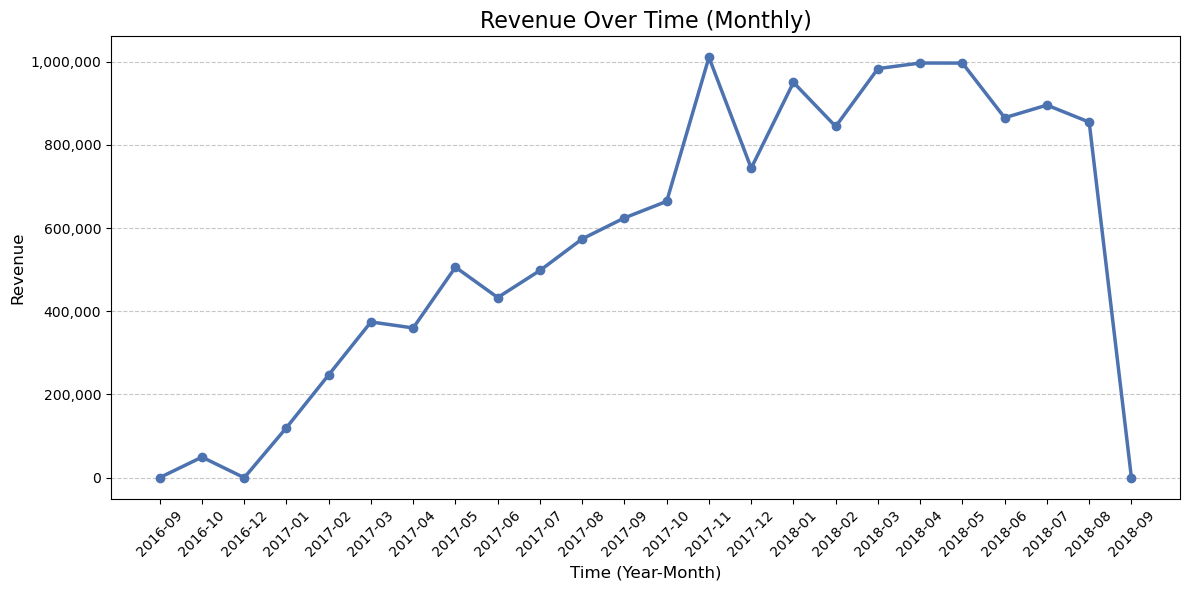

In [28]:
revenue_time = tab1.groupby(tab1['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()

revenue_time.index = revenue_time.index.astype(str)

plt.figure(figsize=(12, 6))
plt.plot(revenue_time.index, revenue_time.values, color='#4c72b0', linewidth=2.5, marker='o')

plt.title('Revenue Over Time (Monthly)', fontsize=16)
plt.xlabel('Time (Year-Month)', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


In [29]:
tab1['year_month'] = tab1['order_purchase_timestamp'].dt.to_period('M')  
revenue_time = tab1.groupby('year_month')['price'].sum()

fig = px.line(revenue_time, x=revenue_time.index.astype(str), y=revenue_time, 
              labels={'x': 'Time (Year-Month)', 'y': 'Revenue'},
              title='Revenue Over Time (Monthly)',
              line_shape='linear')

fig.update_traces(line=dict(color='#4c72b0', width=4))
fig.update_layout(
    xaxis_tickangle=-45,  
    yaxis_tickformat=',.0f',  
    yaxis_title='Revenue',
    title_x=0.5,  
)

fig.show()


C:\Users\masto\AppData\Local\Temp\ipykernel_24392\2749941697.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




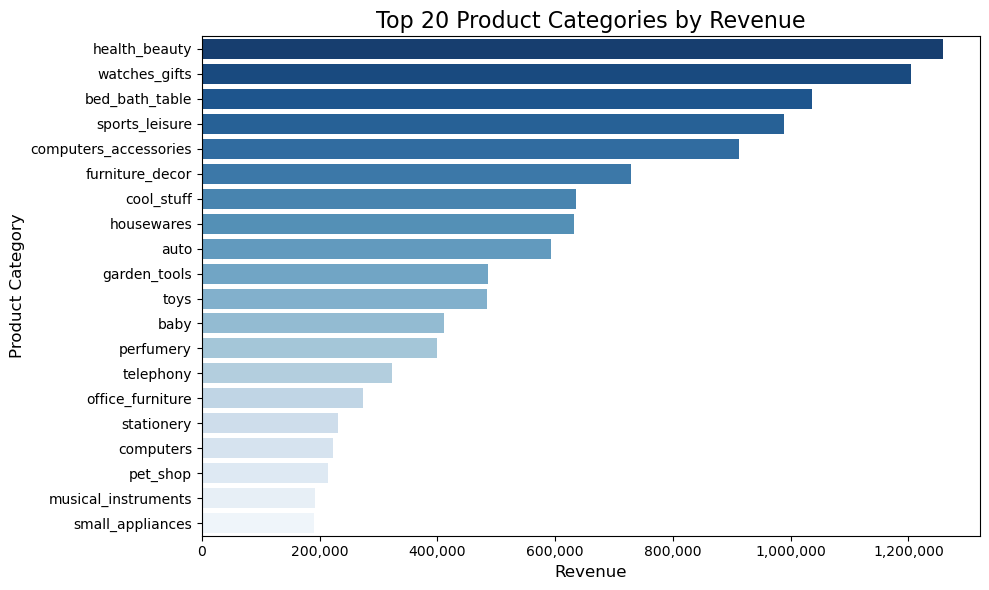

In [30]:
category_revenue = tab1.groupby('product_category_name')['price'].sum()
top_20_categories = category_revenue.sort_values(ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_20_categories.values, y=top_20_categories.index, palette='Blues_r', ax=ax)

ax.set_title('Top 20 Product Categories by Revenue', fontsize=16)
ax.set_xlabel('Revenue', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()


In [31]:
category_revenue = tab1.groupby('product_category_name')['price'].sum()
top_20_categories = category_revenue.sort_values(ascending=False).head(20)

fig = px.bar(top_20_categories, 
             x=top_20_categories.index, 
             y=top_20_categories, 
             labels={'x': 'Product Category', 'y': 'Revenue'},
             title='Top 20 Product Categories by Revenue',
             color=top_20_categories,  
             color_continuous_scale='Blues',  
             text=top_20_categories.round(2))  

fig.update_traces(marker=dict(line=dict(color='#1f77b4', width=1)),  
                  textposition='outside',  
                  texttemplate='%{text}',  
                  opacity=0.8)  

fig.update_layout(
    xaxis_title='Product Category',
    yaxis_title='Revenue',
    xaxis_tickangle=-45,  
    yaxis_tickformat=',.0f',  
    title_x=0.5,  
    title_font=dict(size=16),
)

fig.show()


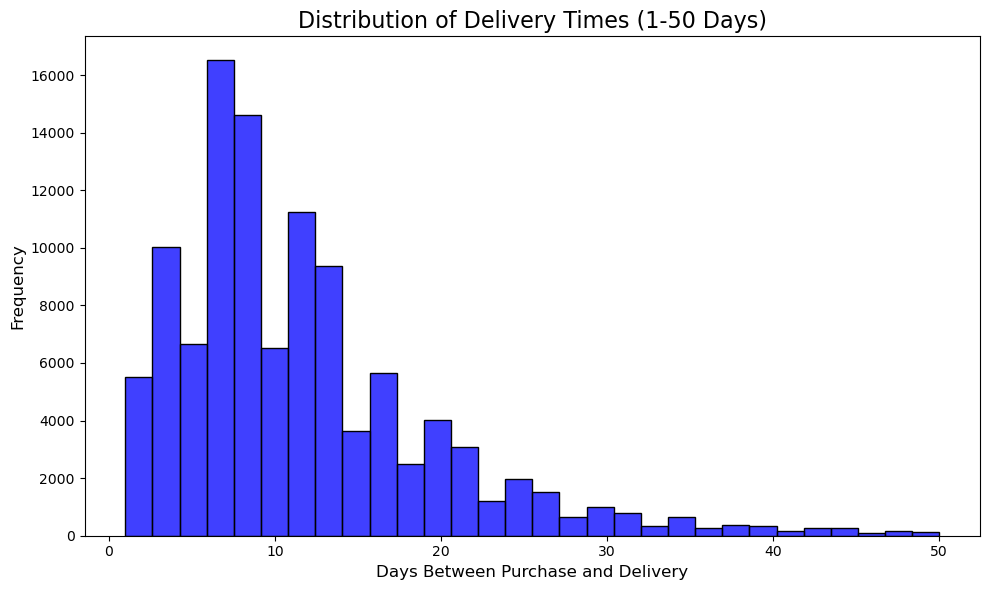

In [32]:
tab1['delivery_time'] = (tab1['order_delivered_customer_date'] - tab1['order_purchase_timestamp']).dt.days
tab1_filtered = tab1[(tab1['delivery_time'] >= 1) & (tab1['delivery_time'] <= 50)].dropna(subset=['delivery_time'])

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(tab1_filtered['delivery_time'], bins=30, kde=False, color='blue', ax=ax)

ax.set_title('Distribution of Delivery Times (1-50 Days)', fontsize=16)
ax.set_xlabel('Days Between Purchase and Delivery', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()


In [33]:
tab1['delivery_time'] = (tab1['order_delivered_customer_date'] - tab1['order_purchase_timestamp']).dt.days

tab1_filtered = tab1[(tab1['delivery_time'] >= 1) & (tab1['delivery_time'] <= 50)].dropna(subset=['delivery_time'])

fig = px.histogram(tab1_filtered, 
                   x='delivery_time', 
                   nbins=30,  
                   labels={'delivery_time': 'Days Between Purchase and Delivery'},
                   title='Distribution of Delivery Times (1-50 Days)')

fig.update_traces(marker=dict(line=dict(color='black', width=1), 
                              color=tab1_filtered['delivery_time'], 
                              colorscale='Blues',  
                              showscale=False),  
                  opacity=0.75)  

fig.update_layout(
    xaxis_title='Days Between Purchase and Delivery',
    yaxis_title='Frequency',
    title_x=0.5,  
    title_font=dict(size=16),
    xaxis_tickformat=',.0f', 
    bargap=0.1,  
)

fig.show()


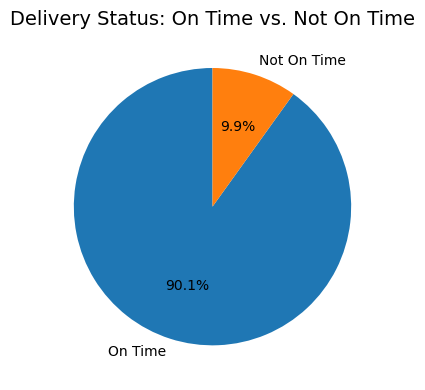

In [34]:
tab1['delivered_on_time'] = tab1['order_delivered_customer_date'] <= tab1['order_estimated_delivery_date']

delivery_status_labels = tab1['delivered_on_time'].map({True: 'On Time', False: 'Not On Time'})

delivery_status = delivery_status_labels.value_counts()

plt.figure(figsize=(4, 4))
delivery_status.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=90)


plt.title('Delivery Status: On Time vs. Not On Time', fontsize=14)
plt.ylabel('')  

plt.tight_layout()
plt.show()


In [35]:
tab1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year_month,delivery_time,delivered_on_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,37.77,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08,2.0,True
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,37.77,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08,5.0,True
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,44.09,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,14.0,True
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,2018-07,13.0,True


In [36]:
tab1=tab1.merge(
    customers,
    on='customer_id',
    how='left'
)

In [37]:
tab1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year_month,delivery_time,delivered_on_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,37.77,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08,2.0,True,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,37.77,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-08,5.0,True,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,44.09,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,14.0,True,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC
4,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0,2018-07,13.0,True,af07308b275d755c9edb36a90c618231,47813,barreiras,BA


In [38]:
tab1=pd.merge(tab1,
    geolocation,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

In [39]:
tab1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,year_month,delivery_time,delivered_on_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.578333,-46.587123,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.574809,-46.587471,sao paulo,SP
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.575033,-46.587451,sao paulo,SP
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2017-10,8.0,True,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149,-23.580054,-46.586673,sao paulo,SP


In [40]:
city_revenue = tab1.groupby('customer_city')['price'].sum().sort_values(ascending=False).head(20)

fig = px.bar(city_revenue,
             x=city_revenue.values,
             y=city_revenue.index,
             labels={'x': 'Revenue', 'y': 'City'},
             title='Top 20 Cities by Revenue',
             color_discrete_sequence=['#a687b7'])  

fig.update_layout(
    xaxis_title='Revenue',
    yaxis_title='City',
    xaxis_tickformat=',.0f',  
    title_x=0.5, 
    title_font=dict(size=16),
    margin=dict(l=100, r=30, t=50, b=100),  
    yaxis=dict(autorange='reversed'),  
)


fig.show()


### RFM Analysis

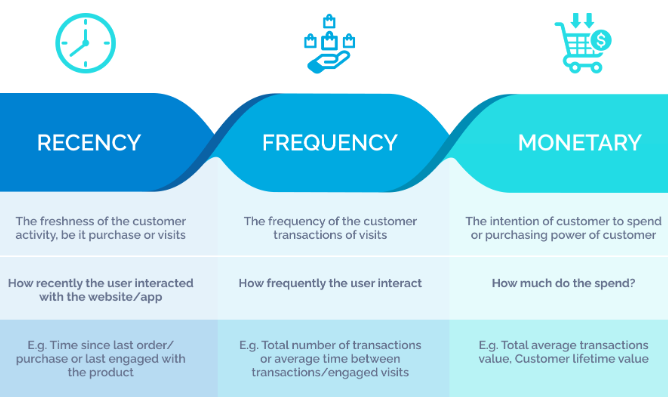

In [41]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [42]:
df=orders.merge(
    order_items,
    on='order_id',
    how='left'
)

In [43]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
total_order_value                 775
dtype: int64

In [44]:
df['Recency'] = (df['order_purchase_timestamp'].max() - df['order_purchase_timestamp']).dt.days

In [45]:
rfm= df.groupby(['customer_id']).agg({'Recency':'min'  
                                           ,'order_purchase_timestamp':pd.Series.nunique
                                           ,'price':'sum'}).reset_index()

In [46]:
rfm.rename(columns={'order_purchase_timestamp':'Frequency','price':'Monetary'},inplace=True)

In [47]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

In [48]:
rfm["recency_score"] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["monetary_score"]= pd.qcut(rfm["Monetary"],4,labels=[1,2,3,4])
rfm.head()

,customer_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,2,1,3
1,000161a058600d5901f007fab4c27140,458,1,54.90,1,1,2
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,1,1,4
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,1,1,3
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,3,1,3


In [49]:
rfm["RFM_Segment"] = rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str)

rfm['RFM_Score'] = rfm[['recency_score','frequency_score','monetary_score']].sum(axis=1)
rfm.head()

,customer_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,2,1,3,213,6
1,000161a058600d5901f007fab4c27140,458,1,54.90,1,1,2,112,4
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,1,1,4,114,6
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,1,1,3,113,5
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,3,1,3,313,7


In [50]:
segt_map = {
    r'[3-4][3-4]4': 'VIP',
    r'[2-3-4][1-2-3-4]4': 'Top Recent',
    r'1[1-2-3-4]4': 'Top at Risk ',

    
    
    r'[3-4][3-4]3': 'High Promising',
    r'[2-3-4][1-2]3': 'High New',
    r'2[3-4]3': 'High Loyal',

    
    
    r'[3-4][3-4]2': 'Medium Potential',
    r'[2-3-4][1-2]2': 'Medium New',
    r'2[3-4]2': 'Medium Loyal',

    
    
    r'4[1-2-3-4]1': 'Low New',
    r'[2-3][1-2-3-4]1': 'Low Loyal',
    
    r'1[1-2-3-4][1-2-3]': 'Need Activation'
}
rfm['Segment_labels'] = rfm['RFM_Segment']
rfm['Segment_labels'] = rfm['Segment_labels'].replace(segt_map, regex=True)
rfm.head()

,customer_id,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_Segment,RFM_Score,Segment_labels
0,00012a2ce6f8dcda20d059ce98491703,337,1,89.80,2,1,3,213,6,High New
1,000161a058600d5901f007fab4c27140,458,1,54.90,1,1,2,112,4,Need Activation
2,0001fd6190edaaf884bcaf3d49edf079,596,1,179.99,1,1,4,114,6,Top at Risk
3,0002414f95344307404f0ace7a26f1d5,427,1,149.90,1,1,3,113,5,Need Activation
4,000379cdec625522490c315e70c7a9fb,198,1,93.00,3,1,3,313,7,High New


In [51]:
segments_grouped = rfm.groupby(["Segment_labels"]).agg({'Monetary': 'sum',
                                   "customer_id": pd.Series.nunique,
                                    "Recency": 'mean',                     
                                     "Frequency": 'mean',
                                                        }).reset_index()

segments_grouped["Monetary%"] = segments_grouped["Monetary"]/segments_grouped["Monetary"].sum()*100
segments_grouped["Count%"] = segments_grouped["customer_id"]/segments_grouped["customer_id"].sum()*100

segments_grouped.rename(columns={'Monetary':'TotalMonetary','customer_id':'TotalCustomers',
                                 'Recency':'MeanRecency','Frequency':'MeanFrequency',
                                 "Count%":"Customers%"},inplace= True)


segments_grouped = segments_grouped.sort_values(by=['Monetary%'], ascending=False)
segments_grouped

,Segment_labels,TotalMonetary,TotalCustomers,MeanRecency,MeanFrequency,Monetary%,Customers%
9,Top Recent,4199956.18,12316,247.779799,1.0,30.901017,12.385233
10,Top at Risk,2145599.11,6055,506.178695,1.0,15.786164,6.089038
11,VIP,2119086.97,6194,163.628673,1.0,15.591102,6.228819
8,Need Activation,1236024.06,18639,504.590912,1.0,9.094000,18.743778
1,High New,1095878.81,9508,217.386306,1.0,8.062887,9.561448
2,High Promising,751188.56,6510,164.573272,1.0,5.526841,6.546595
6,Medium New,590508.17,9338,220.817091,1.0,4.344641,9.390493
7,Medium Potential,382170.33,6012,162.159681,1.0,2.811804,6.045796
0,High Loyal,355870.19,3106,329.420155,1.0,2.618301,3.123460
3,Low Loyal,335435.15,12242,274.587159,1.0,2.467951,12.310817


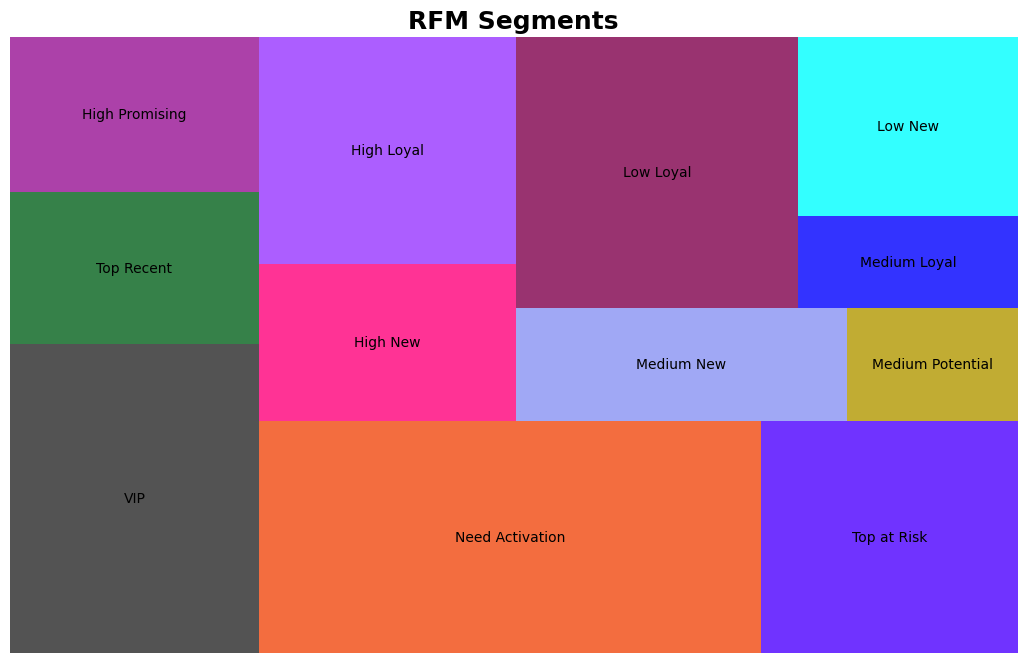

In [52]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 8)
sq.plot(sizes=segments_grouped["Customers%"], 
                      label=['VIP', 
                            "Top Recent", 
                            'High Promising', 
                            'Need Activation', 
                            'Top at Risk', 
                            'High New', 
                            'High Loyal',
                            'Medium New',
                            'Medium Potential',
                            'Low Loyal',
                            'Medium Loyal',
                            'Low New'], 
                            alpha=0.8, 
                            color=["#282828", "#04621B", "#971194", "#F1480F",  "#4C00FF", 
           "#FF007B", "#9736FF", "#8992F3", "#B29800", "#80004C", "blue", "cyan"])#"#A4E919"
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

In [53]:
segments_pareto = segments_grouped[["Segment_labels","TotalMonetary"]]
segments_pareto["CumulativePercentage"] = (segments_pareto["TotalMonetary"].cumsum()/ 
                                      segments_pareto["TotalMonetary"].sum()*100).round(2)

C:\Users\masto\AppData\Local\Temp\ipykernel_24392\3738972307.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\masto\AppData\Local\Temp\ipykernel_24392\2501304085.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



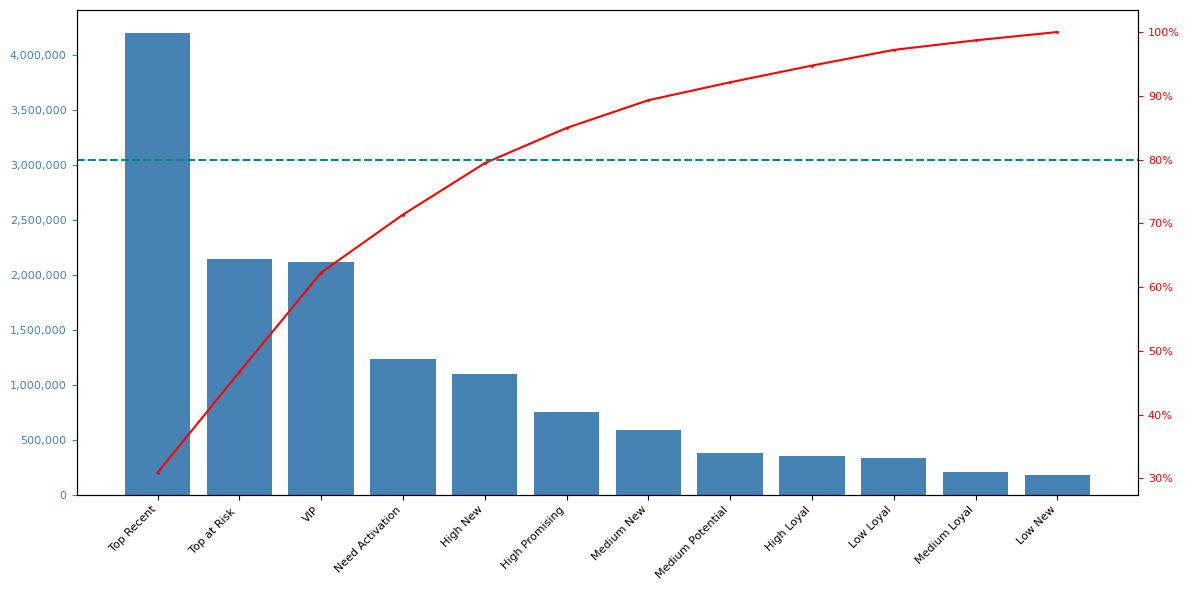

In [54]:
color1 = 'steelblue'
color2 = 'red'

fig, ax = plt.subplots(figsize=(12, 6))  #

ax.bar(segments_pareto['Segment_labels'], segments_pareto['TotalMonetary'], color=color1)


ax2 = ax.twinx()
ax2.plot(segments_pareto['Segment_labels'], segments_pareto['CumulativePercentage'], color=color2, marker="D", ms=1)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axhline(80, color="#008878", linestyle="dashed", alpha=1)

ax.tick_params(axis='y', colors=color1, labelsize=8)
ax2.tick_params(axis='y', colors=color2, labelsize=8)

ax.tick_params(axis='x', labelsize=8)
ax.set_xticklabels(segments_pareto['Segment_labels'], rotation=45, ha='right')  

ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda y, p: format(int(y), ',')))

plt.tight_layout()  
plt.show()


### Apriori

In [55]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value,Recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,38.71,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,141.46,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,179.12,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,72.20,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,28.62,245


In [56]:
df.dropna(subset='product_id',inplace=True)

In [57]:
# inputs
supp = 1 # minimum support of an assoc. rule (default: 10)
conf = 5 # minimum confidence of an assoc. rule (default: 80%)
report = 'aSCl'

In [58]:
report_colnames = {
    'a': 'support_itemset_absolute',
    's': 'support_itemset_relative',
    'S': 'support_itemset_relative_pct',
    'b': 'support_bodyset_absolute',
    'x': 'support_bodyset_relative',
    'X': 'support_bodyset_relative_pct',
    'h': 'support_headitem_absolute',
    'y': 'support_headitem_relative',
    'Y': 'support_headitem_relative_pct',
    'c': 'confidence',
    'C': 'confidence_pct',
    'l': 'lift',
    'L': 'lift_pct',
    'e': 'evaluation',
    'E': 'evaluation_pct',
    'Q': 'support of the empty set (total number of transactions)'
    }

In [59]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_order_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [60]:
transactions = order_items.groupby('order_id')['product_id'].apply(list).tolist()

rules = apriori(transactions, min_support=0.0001, min_confidence=0.1, min_lift=1, max_length=2)

results = list(rules)

for rule in results:
    for ordered_stat in rule.ordered_statistics:
        print(f"Rule: {set(ordered_stat.items_base)} -> {set(ordered_stat.items_add)}")
        print(f"Support: {rule.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}")
        print("-" * 30)


Rule: {'35afc973633aaeb6b877ff57b2793310'} -> {'99a4788cb24856965c36a24e339b6058'}
Support: 0.00029392090487097885
Confidence: 0.1858974358974359
Lift: 39.27570965793664
------------------------------
Rule: {'36f60d45225e60c7da4558b070ce4b60'} -> {'3f14d740544f37ece8a9e7bc8349797e'}
Support: 0.0001216224433948878
Confidence: 0.1081081081081081
Lift: 131.68635301968635
------------------------------
Rule: {'3f14d740544f37ece8a9e7bc8349797e'} -> {'36f60d45225e60c7da4558b070ce4b60'}
Support: 0.0001216224433948878
Confidence: 0.14814814814814814
Lift: 131.68635301968632
------------------------------
Rule: {'36f60d45225e60c7da4558b070ce4b60'} -> {'e53e557d5a159f5aa2c5e995dfdf244b'}
Support: 0.0003445969229521821
Confidence: 0.3063063063063063
Lift: 193.73088473088472
------------------------------
Rule: {'e53e557d5a159f5aa2c5e995dfdf244b'} -> {'36f60d45225e60c7da4558b070ce4b60'}
Support: 0.0003445969229521821
Confidence: 0.21794871794871795
Lift: 193.73088473088472
------------------------